# Enviroment notes 
 - Running on python 3.11.7
 - Pandas version 2.2.1

In [1]:
# Data analysis
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
# Data manipulation
import numpy as np
# Sklearn
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Section 0: Data analysis
Getting a good look at the data, seeing what is found inside, and most importantly, checking for NULL values. 

In [2]:
# load the CSV data into a DataFrame
df = pd.read_csv('Phishing_Email.csv')

In [3]:
# Look at header data
df.head(n=10)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\r\nHello I am your hot lil horny toy.\r\n ...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [4]:
# look at features 
df.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [5]:
# count of safe emails in the dataset and count of phishing emails in the dataset
df['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [6]:
# check for null values in all columns
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [7]:
# Print all emails with blank text 
df[df['Email Text'].isnull()]

,Unnamed: 0,Email Text,Email Type
31,31,NaN,Phishing Email
387,387,NaN,Phishing Email
1883,1883,NaN,Phishing Email
2049,2049,NaN,Phishing Email
2451,2451,NaN,Phishing Email
2972,2972,NaN,Phishing Email
3627,3627,NaN,Phishing Email
3806,3806,NaN,Phishing Email
5763,5763,NaN,Phishing Email
6299,6299,NaN,Phishing Email


In [8]:
df.dropna(subset=["Email Text"], inplace = True) #remove blank text emails
df[df['Email Text'].isnull()] #check if there are any blank text emails
# check for null values in all columns
df.isnull().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

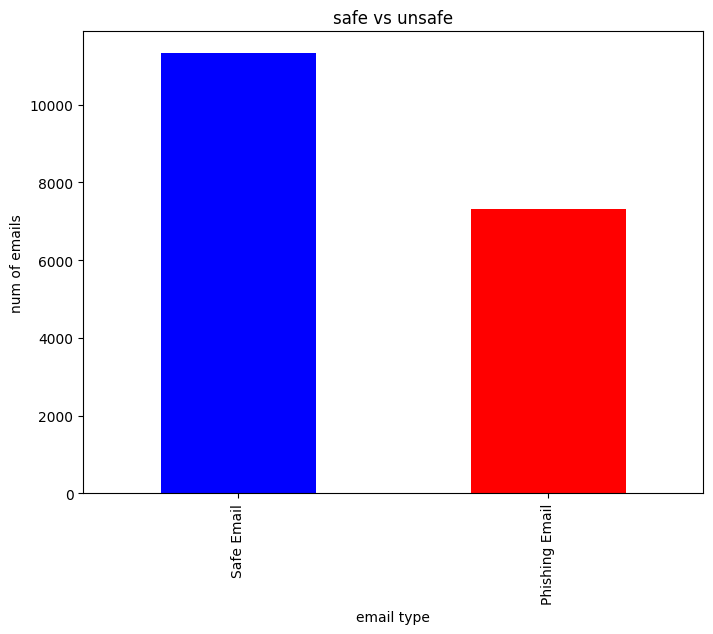

In [9]:
email_type = df['Email Type'].value_counts()

plt.figure(figsize=(8, 6))
email_type.plot(kind='bar', color=['blue', 'red'])
plt.title('safe vs unsafe')
plt.xlabel('email type')
plt.ylabel('num of emails')
plt.show()

In [10]:
target = df[df["Email Type"] == "Phishing Email"]


# Section 1: Using KNN and other familiar tech

In [11]:
# Convert email type to boolean 
dict = {
    "Phishing Email" : True,
    "Safe Email" : False
}
target = df["Email Type"]
target.map(dict)
df["Email Type"] = df["Email Type"].map(dict)

In [19]:
# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'Email Text' column
df['Email Text'] = vectorizer.fit_transform(df['Email Text']).toarray()
df["Email Text"] = df["Email Text"].astype('float64')

NameError: name 'TfidfVectorizer' is not defined

In [12]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",False
1,1,the other side of * galicismos * * galicismo *...,False
2,2,re : equistar deal tickets are you still avail...,False
3,3,\r\nHello I am your hot lil horny toy.\r\n ...,True
4,4,software at incredibly low prices ( 86 % lower...,True


In [13]:
KNeighborsClassifier(n_neighbors=5, weights='uniform')
X_train, X_test, y_train, y_test = train_test_split(df, target, random_state=11, test_size=0.8)
#define knn from the KNeighborsClassifier function defined in the sklearn.neighbors module
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

ValueError: could not convert string to float: "re : various topics thanks for the note great to see james - i am really warming to his style and we can do some good work on promoting a global standard for static reference data control - more to say on that next week looking forward to dallas and am planning to return to houston for wed and thurs ( with steve and richard - although richard is leaving on wed night ( something about valentine ' s night and only getting so much time away ! ! ) ) . thursday lunch sounds good - you know i love mexican ! ! i will try to buy shona and a few usual suspects dinner on wednesday speak to you soon - and good luck with the rest of the appraisals enron capital & trade resources corp . from : sally beck 06 / 02 / 2001 17 : 24 to : mike jordan / lon / ect @ ect cc : subject : various topics no memo out yet on the doorstep process . i am still in the throws of completing the 13 reviews that i have to give - should be finished by 5 : 00 . i will send the memo on doorstep process to you , fernley and michael brown before i leave for the day . i will be in the calgary office wednesday and thursday with peggy hedstrom and her team . back in the houston office on friday . hope that james ' visit is going well . thanks for getting appointments organized for him . i look forward to seeing you in dallas next week . i am glad that you , richard and steve will be able to participate . are you still planning to come back to houston after the meeting in dallas ? i fly from dallas to austin on tuesday night , so that i can do a full day of interviews at ut for summer interns on wednesday . i will be back in the office on thursday and friday that week . let me know if we can help in setting up any appointments . we can do lunch on thursday or friday , if your schedule allows . i can also set some time aside to perhaps download from our dallas meeting and to follow up on some other issues . i would offer dinner on thursday night , but that is my birthday and i think ( hope ) that my family will have dinner plans for me that evening . is there someone else in houston that you would like to have dinner with while you are here ? - - sally"